# 1-scale-均值移除

In [1]:
import numpy as np
import sklearn.preprocessing as sp
raw_samples = np.array([
    [17., 100., 4000],
    [20., 80., 5000],
    [23., 75., 5500]])

#均值移除
std_samples = sp.scale(raw_samples)
print(std_samples)
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

[[-1.22474487  1.38873015 -1.33630621]
 [ 0.         -0.46291005  0.26726124]
 [ 1.22474487 -0.9258201   1.06904497]]
[ 0.00000000e+00 -3.70074342e-17  5.18104078e-16]
[1. 1. 1.]


# 2-mms-范围缩放

In [2]:
import sklearn.preprocessing as sp
import numpy as np


samples=np.array([[17.,90.,6000.],
                  [20.,100.,8000.],
                  [25.,70.,7000.]])

mms=sp.MinMaxScaler(feature_range=(0,1))
r=mms.fit_transform(samples)
print(r)

#手动实现
samples_copy=[]
for col in samples.T:
    col_min=col.min()
    col_max=col.max()
    #[[max 1][max 1] * [k, b]=[0 1]]
    A=np.array([[col_min,1],[col_max,1]])
    B=np.array([0,1])
    #解方程        ==lstsq
    x=np.linalg.solve(A,B)
    k,b=x[0],x[1]
    y=col * k + b
    samples_copy.append(y)
print(np.array(samples_copy).T)

[[0.         0.66666667 0.        ]
 [0.375      1.         1.        ]
 [1.         0.         0.5       ]]
[[0.         0.66666667 0.        ]
 [0.375      1.         1.        ]
 [1.         0.         0.5       ]]


# 3-norm-归一化

In [7]:
import sklearn.preprocessing as sp
import numpy as np


samples=np.array([[17.,90.,6000.],
                  [20.,100.,8000.],
                  [25.,70.,7000.]])

r=sp.normalize(samples,norm='l2')
print(r)

[[0.002833   0.01499825 0.99988351]
 [0.0024998  0.01249898 0.99991876]
 [0.00357123 0.00999944 0.99994363]]


# 4-bin-二值化

In [8]:
import sklearn.preprocessing as sp
import numpy as np
import matplotlib.pyplot as mp
import scipy.misc as sm

samples=np.array([[17.,90.,6000.],
                  [20.,100.,8000.],
                  [25.,70.,7000.]])

bin=sp.Binarizer(threshold=80)
#二值化器
r=bin.transform(samples)
print(r)

#读取数据
img=sm.imread('../data/da_date/lily.jpg',True)
#转置
img2=bin.transform(img)
mp.imshow(img2,cmap='gray')
mp.subplot(121)

img[img<=120]=0
img[img>120]=1
mp.subplot(122)
mp.imshow(img,cmap='gray')
mp.show()

[[0. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


AttributeError: module 'scipy.misc' has no attribute 'imread'

# 5-ohe-独热编码

In [9]:
import sklearn.preprocessing as sp
import numpy as np
import matplotlib.pyplot as mp
import scipy.misc as sm

samples=np.array([[1,3,2],
                  [7,5,4],
                  [1,8,6],
                  [7,3,6]]
                 )

ohe=sp.OneHotEncoder(sparse=False)
r=ohe.fit_transform(samples)
print(r,type(r))

[[1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 1.]] <class 'numpy.ndarray'>


/home/tarena/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# 6-lbe-标签编码

In [11]:
import numpy as np
import sklearn.preprocessing as sp


#标签处理一列数据
samples=np.array(['apple','banana','orange','pair','edge','elephone','fox'])
print(samples)
# 获取标签编码器
lbe=sp.LabelEncoder()
# 调用标签编码器的fit_transform方法训练并且为原始样本矩阵进行标签编码
			  #先训练在转换
lb=lbe.fit_transform(samples)
print(lb)
print(lbe.transform(['orange']))

#预测结果，把编码转成对应字符串
label=[0,1,5,6,2,3,4]
# 根据标签编码的结果矩阵反查字典 得到原始数据矩阵
w=lbe.inverse_transform(label)
print(w)

['apple' 'banana' 'orange' 'pair' 'edge' 'elephone' 'fox']
[0 1 5 6 2 3 4]
[5]
['apple' 'banana' 'orange' 'pair' 'edge' 'elephone' 'fox']


# 7-loss-损失函数

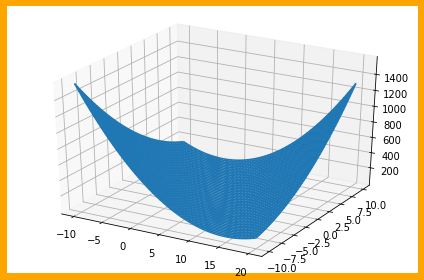

In [17]:
import numpy as np
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d

x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

w0,w1=np.meshgrid(np.linspace(-10,20,1000),np.linspace(-10,10,1000))

#根据w0与w1计算每个坐标点的loss值
loss=np.zeros(w0.shape)
for px,py in zip(x,y):
    loss+=1/2*(w0+w1*px-py)**2

mp.figure("3D Contour",facecolor='orange')
ax3d=mp.gca(projection='3d')
# ax3d.plot_surface(x,y,z,cstride=10,rstride=10,cmap='jet')
ax3d.plot_wireframe(w0,w1,loss)
mp.tight_layout()
mp.show()

# 8-lr-线性回归

4.107299270072887 2.218978102189891


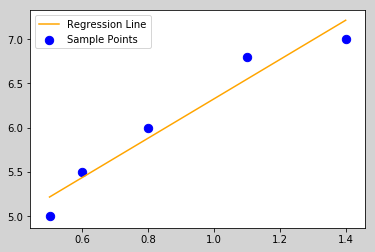

In [14]:
import numpy as np
import matplotlib.pyplot as mp

train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])

# 梯度下降
times = 1000000
lrate = 0.01  # 学习率
w0, w1 = 1, 1

for i in range(1, times + 1):
    # 求取d0与d1，两方向的偏导数
    d0 = (w0 + w1 * train_x - train_y).sum()
    d1 = (train_x * (w0 + w1 * train_x - train_y)).sum()
    w0=w0-d0 * lrate
    w1=w1-d1 * lrate
print(w0,w1)


#绘图
mp.figure('Linear Regreesion',facecolor='lightgray')
mp.scatter(train_x,train_y,s=70,marker='o',color='blue',label='Sample Points')

#绘制回归线
pred_y=w0 + w1 *train_x
mp.plot(train_x,pred_y,color='orange',label='Regression Line')


mp.legend()
mp.show()